# **ENCONTRAR MODELOS QUE CUMPLAN LOS SUPUESTOS**

(1) ARIMA(4,0,0)(1,0,1)[12], AIC=3966.056  
(2) ARIMA(4,0,1)(1,0,1)[12], AIC=3967.978  
(3) ARIMA(4,0,0)(1,0,2)[12], AIC=3968.090  
(4) ARIMA(4,0,0)(2,0,1)[12], AIC=3968.231  
(5) ARIMA(5,0,0)(1,0,1)[12], AIC=3973.839  
(6) ARIMA(3,0,0)(1,0,1)[12], AIC=3979.490  
(7) ARIMA(3,0,0)(1,0,2)[12], AIC=3981.431  
(8) ARIMA(3,0,0)(2,0,1)[12], AIC=3981.441  
(9) ARIMA(2,0,0)(1,0,1)[12], AIC=3982.753  
(10) ARIMA(2,0,0)(1,0,2)[12], AIC=3984.673  
(11) ARIMA(2,0,0)(2,0,1)[12], AIC=3984.687  
(12) ARIMA(1,0,0)(1,0,1)[12], AIC=3986.540  
(13) ARIMA(1,0,0)(1,0,2)[12], AIC=3988.490  
(14) ARIMA(1,0,0)(2,0,1)[12], AIC=3988.500   
(15) ARIMA(4,0,0)(2,0,0)[12], AIC=4001.353  
(16) ARIMA(3,0,0)(2,0,0)[12], AIC=4014.781  
(17) ARIMA(2,0,0)(2,0,0)[12], AIC=4018.072  
(18) ARIMA(1,0,0)(2,0,0)[12], AIC=4023.570  
(19) ARIMA(4,0,0)(1,0,0)[12], AIC=4037.099  
(20) ARIMA(4,0,0)(0,0,2)[12], AIC=4041.324  
(21) ARIMA(0,0,0)(1,0,1)[12], AIC=4045.176  
(22) ARIMA(4,0,0)(0,0,1)[12], AIC=4054.553  
(23) ARIMA(3,0,0)(1,0,0)[12], AIC=4063.736  
(24) ARIMA(2,0,0)(1,0,0)[12], AIC=4071.669  
(25) ARIMA(1,0,0)(1,0,0)[12], AIC=4074.805  
(26) ARIMA(4,0,0)(0,0,0)[12], AIC=4085.184  
(27) ARIMA(3,0,0)(0,0,2)[12], AIC=4086.016  
(28) ARIMA(3,0,0)(0,0,1)[12], AIC=4106.841  
(29) ARIMA(2,0,0)(0,0,2)[12], AIC=4110.743  
(30) ARIMA(1,0,0)(0,0,2)[12], AIC=4110.941  
(31) ARIMA(1,0,0)(0,0,1)[12], AIC=4138.416  
(32) ARIMA(2,0,0)(0,0,1)[12], AIC=4140.415  
(33) ARIMA(3,0,0)(0,0,0)[12], AIC=4160.393  
(34) ARIMA(0,0,1)(0,0,1)[12], AIC=4193.130  
(35) ARIMA(2,0,0)(0,0,0)[12], AIC=4220.945  
(36) ARIMA(1,0,0)(0,0,0)[12], AIC=4227.799  
(37) ARIMA(0,0,0)(0,0,0)[12], AIC=4565.249  

## **Cargar los datos**

In [1]:
import pandas as pd
from sklearn.preprocessing import PowerTransformer
import numpy as np

data=pd.read_csv('MXN00021035.csv')

pre=data.iloc[:,6]  # Precipitacion, es la columna 5
date=data.iloc[:,5] # Date, es la columna 6
date = date.astype(str).str.replace(r'(\d{4})(\d{2})', r'\1/\2', regex=True)    # La fecha está como 195210 y la pasamos a 1952/10 
date = pd.to_datetime(date, format='%Y/%m')                                     # Lo convertimos en fecha
pre = pd.Series(pre.values, index=date)                                         # Creamos una Serie

# Partir la serie para train y test
pre_total = pre.copy()          # Copia de la serie original

# Todas hasta los ultimos 12 meses
pre = pre_total[:-12]           # Entrenamiento: todos menos los últimos 12 meses
pre_test = pre_total[-12:]      # Test: últimos 12 meses

X = pre.values.reshape(-1, 1)

# Ajuste original para obtener lambda estimado
pt = PowerTransformer(method='yeo-johnson', standardize=False)
ypre = pt.fit_transform(X)

# **MODELADO**

In [2]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from modelo_admisible import * # Una funcion que hice para verificar si los parametros son estacionarios/invertibles

## **1° Modelo con mejor AIC**

In [3]:
modelo=SARIMAX(ypre,
               order=(4,0,0),
               seasonal_order=(1,0,1,12)).fit()

modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  660
Model:             SARIMAX(4, 0, 0)x(1, 0, [1], 12)   Log Likelihood               -1995.315
Date:                              Fri, 25 Apr 2025   AIC                           4004.631
Time:                                      17:45:53   BIC                           4036.076
Sample:                                           0   HQIC                          4016.819
                                              - 660                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3003      0.035      8.536      0.000       0.231       0.369
ar.L2          0.1461      0.041      3.554      0.000       0.066       0.227
ar.L3         -0.0319      0.041     -0.770      0.441      -0.113       0.049
ar.L4         -0.1213      0.040     -3.056      0.002      -0.199      -0.044
ar.S.L12       0.9880      0.006    178.208      0.000       0.977       0.999
ma.S.L12      -0.6971      0.035    -20.193      0.000      -0.765      -0.629
sigma2        23.8214      1.214     19.618      0.000      21.442      26.201
===================================================================================
Ljung-Box (L1) (Q):                   0.39   Jarque-Bera (JB):                14.47
Prob(Q):                              0.53   Prob(JB):                         0.00
Heteroskedasticity (H):               0.80   Skew:                            -0.27
Prob(H) (two-sided):                  0.09   Kurtosis:                         3.49
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [4]:
parsimonia(modelo)

Hay coeficientes no significativos, no se cumple el principio de parsimonia


In [5]:
estacionario(modelo)

El polinomio de la parte autoregresiva es: {'p1': -0.300346048937883, 'p2': -0.1460809651941793, 'p3': 0.03191355424370412, 'p4': 0.12133348745962615, 'p12': -0.9880114220431615}

Raíces del polinomio característico: [-1.01991628+0.j         -0.87191178+0.51188981j -0.87191178-0.51188981j
 -0.50674469+0.88079915j -0.50674469-0.88079915j  0.02354783+1.02463514j
  0.02354783-1.02463514j  0.53490948+0.8379842j   0.53490948-0.8379842j
  0.84387271+0.46792216j  0.84387271-0.46792216j  0.97256919+0.j        ]

Módulo de las raíces: [1.01991628 1.0110694  1.0110694  1.01616796 1.01616796 1.02490569
 1.02490569 0.99415575 0.99415575 0.96492088 0.96492088 0.97256919]

¿Las raíces están fuera del círculo unitario?  False

El modelo no es estacionario


## **2° Modelo con mejor AIC**

In [6]:
modelo=SARIMAX(ypre,
               order=(4,0,1),
               seasonal_order=(1,0,1,12)).fit()

modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  660
Model:             SARIMAX(4, 0, 1)x(1, 0, 1, 12)   Log Likelihood               -1984.394
Date:                            Fri, 25 Apr 2025   AIC                           3984.787
Time:                                    17:45:54   BIC                           4020.725
Sample:                                         0   HQIC                          3998.717
                                            - 660                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8873      0.101      8.804      0.000       0.690       1.085
ar.L2         -0.0415      0.061     -0.676      0.499      -0.162       0.079
ar.L3         -0.0966      0.058     -1.668      0.095      -0.210       0.017
ar.L4         -0.1591      0.048     -3.308      0.001      -0.253      -0.065
ma.L1         -0.6096      0.101     -6.048      0.000      -0.807      -0.412
ar.S.L12       0.9967      0.002    540.851      0.000       0.993       1.000
ma.S.L12      -0.7720      0.032    -24.325      0.000      -0.834      -0.710
sigma2        22.6429      1.140     19.864      0.000      20.409      24.877
===================================================================================
Ljung-Box (L1) (Q):                   0.17   Jarque-Bera (JB):                 9.92
Prob(Q):                              0.68   Prob(JB):                         0.01
Heteroskedasticity (H):               0.79   Skew:                            -0.21
Prob(H) (two-sided):                  0.08   Kurtosis:                         3.43
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [7]:
parsimonia(modelo)

Hay coeficientes no significativos, no se cumple el principio de parsimonia


In [8]:
estacionario(modelo)

El polinomio de la parte autoregresiva es: {'p1': -0.8872876780833041, 'p2': 0.04147857369991719, 'p3': 0.09658334519393869, 'p4': 0.1591459664412079, 'p12': -0.9967299544141882}

Raíces del polinomio característico: [-1.06311101+0.j         -0.89539628+0.54966805j -0.89539628-0.54966805j
 -0.48634149+0.91972028j -0.48634149-0.91972028j  0.06812343+1.0320463j
  0.06812343-1.0320463j   0.57269517+0.79480956j  0.57269517-0.79480956j
  0.92817818+0.j          0.80838558+0.41876971j  0.80838558-0.41876971j]

Módulo de las raíces: [1.06311101 1.05065192 1.05065192 1.040391   1.040391   1.03429221
 1.03429221 0.97964381 0.97964381 0.92817818 0.91041492 0.91041492]

¿Las raíces están fuera del círculo unitario?  False

El modelo no es estacionario


## **3° Modelo con mejor AIC**

In [9]:
modelo=SARIMAX(ypre,
               order=(4,0,0),
               seasonal_order=(1,0,2,12)).fit()

modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:                                       y   No. Observations:                  660
Model:             SARIMAX(4, 0, 0)x(1, 0, [1, 2], 12)   Log Likelihood               -1995.310
Date:                                 Fri, 25 Apr 2025   AIC                           4006.620
Time:                                         17:45:56   BIC                           4042.558
Sample:                                              0   HQIC                          4020.549
                                                 - 660                                         
Covariance Type:                                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3006      0.035      8.522      0.000       0.231       0.370
ar.L2          0.1460      0.041      3.538      0.000       0.065       0.227
ar.L3         -0.0321      0.042     -0.772      0.440      -0.114       0.049
ar.L4         -0.1213      0.040     -3.054      0.002      -0.199      -0.043
ar.S.L12       0.9881      0.006    174.714      0.000       0.977       0.999
ma.S.L12      -0.6942      0.039    -17.744      0.000      -0.771      -0.618
ma.S.L24      -0.0045      0.038     -0.120      0.905      -0.078       0.069
sigma2        23.8213      1.214     19.618      0.000      21.441      26.201
===================================================================================
Ljung-Box (L1) (Q):                   0.39   Jarque-Bera (JB):                14.48
Prob(Q):                              0.53   Prob(JB):                         0.00
Heteroskedasticity (H):               0.80   Skew:                            -0.27
Prob(H) (two-sided):                  0.09   Kurtosis:                         3.49
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [10]:
parsimonia(modelo)

Hay coeficientes no significativos, no se cumple el principio de parsimonia


In [11]:
estacionario(modelo)

El polinomio de la parte autoregresiva es: {'p1': -0.3006174215854788, 'p2': -0.14598922658307864, 'p3': 0.03206894850677084, 'p4': 0.12128358800794675, 'p12': -0.9881300733071426}

Raíces del polinomio característico: [-1.01991649+0.j         -0.87192347+0.51189595j -0.87192347-0.51189595j
 -0.50672801+0.88082138j -0.50672801-0.88082138j  0.02357903+1.02462004j
  0.02357903-1.02462004j  0.53490793+0.83794822j  0.53490793-0.83794822j
  0.84384749+0.46790995j  0.84384749-0.46790995j  0.97255053+0.j        ]

Módulo de las raíces: [1.01991649 1.01108258 1.01108258 1.01617891 1.01617891 1.02489131
 1.02489131 0.99412459 0.99412459 0.9648929  0.9648929  0.97255053]

¿Las raíces están fuera del círculo unitario?  False

El modelo no es estacionario


## **4° Modelo con mejor AIC**

In [12]:
modelo=SARIMAX(ypre,
               order=(4,0,0),
               seasonal_order=(2,0,1,12)).fit()

modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  660
Model:             SARIMAX(4, 0, 0)x(2, 0, [1], 12)   Log Likelihood               -1995.310
Date:                              Fri, 25 Apr 2025   AIC                           4006.621
Time:                                      17:45:57   BIC                           4042.559
Sample:                                           0   HQIC                          4020.550
                                              - 660                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3006      0.035      8.521      0.000       0.231       0.370
ar.L2          0.1460      0.041      3.539      0.000       0.065       0.227
ar.L3         -0.0320      0.042     -0.771      0.441      -0.113       0.049
ar.L4         -0.1213      0.040     -3.055      0.002      -0.199      -0.043
ar.S.L12       0.9939      0.056     17.881      0.000       0.885       1.103
ar.S.L24      -0.0058      0.053     -0.108      0.914      -0.110       0.099
ma.S.L12      -0.7003      0.049    -14.161      0.000      -0.797      -0.603
sigma2        23.8209      1.214     19.619      0.000      21.441      26.201
===================================================================================
Ljung-Box (L1) (Q):                   0.39   Jarque-Bera (JB):                14.48
Prob(Q):                              0.53   Prob(JB):                         0.00
Heteroskedasticity (H):               0.80   Skew:                            -0.27
Prob(H) (two-sided):                  0.09   Kurtosis:                         3.49
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [13]:
parsimonia(modelo)

Hay coeficientes no significativos, no se cumple el principio de parsimonia


In [14]:
estacionario(modelo)

El polinomio de la parte autoregresiva es: {'p1': -0.30058617341685673, 'p2': -0.14600216837335225, 'p3': 0.032035186243183536, 'p4': 0.12128846360497197, 'p12': -0.9939491875492701, 'p24': 0.005762942554589791}

Raíces del polinomio característico: [-1.53473894e+00+0.j         -1.32979376e+00+0.76740601j
 -1.32979376e+00-0.76740601j -7.67240592e-01+1.32963395j
 -7.67240592e-01-1.32963395j -4.45423246e-04+1.53447759j
 -4.45423246e-04-1.53447759j  7.66988777e-01+1.33039536j
  7.66988777e-01-1.33039536j -1.02004854e+00+0.j
 -8.71948370e-01+0.51196967j -8.71948370e-01-0.51196967j
 -5.06772669e-01+0.8809093j  -5.06772669e-01-0.8809093j
  2.37756678e-02+1.02476283j  2.37756678e-02-1.02476283j
  1.33022721e+00+0.76785877j  1.33022721e+00-0.76785877j
  1.53526639e+00+0.j          5.35028030e-01+0.83773167j
  5.35028030e-01-0.83773167j  8.43736151e-01+0.46777952j
  8.43736151e-01-0.46777952j  9.72411033e-01+0.j        ]

Módulo de las raíces: [1.53473894 1.53533821 1.53533821 1.53511712 1.5351

## **5° Modelo con mejor AIC**

In [15]:
modelo=SARIMAX(ypre,
               order=(5,0,0),
               seasonal_order=(1,0,1,12)).fit()

modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  660
Model:             SARIMAX(5, 0, 0)x(1, 0, [1], 12)   Log Likelihood               -1986.049
Date:                              Fri, 25 Apr 2025   AIC                           3988.098
Time:                                      17:45:58   BIC                           4024.036
Sample:                                           0   HQIC                          4002.028
                                              - 660                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2954      0.035      8.479      0.000       0.227       0.364
ar.L2          0.1388      0.041      3.386      0.001       0.058       0.219
ar.L3         -0.0145      0.041     -0.356      0.722      -0.094       0.065
ar.L4         -0.0932      0.042     -2.225      0.026      -0.175      -0.011
ar.L5         -0.1895      0.037     -5.155      0.000      -0.261      -0.117
ar.S.L12       0.9949      0.003    368.266      0.000       0.990       1.000
ma.S.L12      -0.7637      0.032    -23.629      0.000      -0.827      -0.700
sigma2        22.9265      1.181     19.415      0.000      20.612      25.241
===================================================================================
Ljung-Box (L1) (Q):                   0.83   Jarque-Bera (JB):                10.69
Prob(Q):                              0.36   Prob(JB):                         0.00
Heteroskedasticity (H):               0.77   Skew:                            -0.25
Prob(H) (two-sided):                  0.06   Kurtosis:                         3.37
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [16]:
parsimonia(modelo)

Hay coeficientes no significativos, no se cumple el principio de parsimonia


In [17]:
estacionario(modelo)

El polinomio de la parte autoregresiva es: {'p1': -0.2954202472185968, 'p2': -0.1388057549895606, 'p3': 0.014523610986628157, 'p4': 0.09319488734433287, 'p5': 0.1894640063531091, 'p12': -0.9948518293458459}

Raíces del polinomio característico: [-1.00397912+0.j         -0.88710316+0.51151576j -0.88710316-0.51151576j
 -0.48969912+0.88157471j -0.48969912-0.88157471j  0.00767171+1.01953715j
  0.00767171-1.01953715j  0.54846345+0.84388147j  0.54846345-0.84388147j
  0.98728965+0.j          0.82901186+0.46457735j  0.82901186-0.46457735j]

Módulo de las raíces: [1.00397912 1.02401191 1.02401191 1.00845386 1.00845386 1.01956601
 1.01956601 1.00645322 1.00645322 0.98728965 0.95031193 0.95031193]

¿Las raíces están fuera del círculo unitario?  False

El modelo no es estacionario


## **6° Modelo con mejor AIC**

In [18]:
modelo=SARIMAX(ypre,
               order=(3,0,0),
               seasonal_order=(1,0,1,12)).fit()

modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  660
Model:             SARIMAX(3, 0, 0)x(1, 0, [1], 12)   Log Likelihood               -1999.521
Date:                              Fri, 25 Apr 2025   AIC                           4011.043
Time:                                      17:45:59   BIC                           4037.996
Sample:                                           0   HQIC                          4021.490
                                              - 660                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3017      0.035      8.615      0.000       0.233       0.370
ar.L2          0.1333      0.041      3.276      0.001       0.054       0.213
ar.L3         -0.0580      0.039     -1.478      0.139      -0.135       0.019
ar.S.L12       0.9827      0.007    133.392      0.000       0.968       0.997
ma.S.L12      -0.6673      0.035    -19.017      0.000      -0.736      -0.599
sigma2        24.2344      1.263     19.183      0.000      21.758      26.710
===================================================================================
Ljung-Box (L1) (Q):                   0.14   Jarque-Bera (JB):                14.32
Prob(Q):                              0.70   Prob(JB):                         0.00
Heteroskedasticity (H):               0.81   Skew:                            -0.27
Prob(H) (two-sided):                  0.13   Kurtosis:                         3.47
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [19]:
parsimonia(modelo)

Hay coeficientes no significativos, no se cumple el principio de parsimonia


In [20]:
estacionario(modelo)

El polinomio de la parte autoregresiva es: {'p1': -0.30167666956999567, 'p2': -0.1333115639367756, 'p3': 0.057978430935308974, 'p12': -0.9827357188394699}

Raíces del polinomio característico: [-1.01011989+0.j         -0.88130486+0.50660505j -0.88130486-0.50660505j
 -0.50295972+0.89110442j -0.50295972-0.89110442j  0.027195  +1.01534784j
  0.027195  -1.01534784j  0.52640432+0.84366618j  0.52640432-0.84366618j
  0.85346619+0.46670264j  0.85346619-0.46670264j  0.96451803+0.j        ]

Módulo de las raíces: [1.01011989 1.01653673 1.01653673 1.02324756 1.02324756 1.01571196
 1.01571196 0.9944215  0.9944215  0.97273629 0.97273629 0.96451803]

¿Las raíces están fuera del círculo unitario?  False

El modelo no es estacionario


## **7° Modelo con mejor AIC**

In [21]:
modelo=SARIMAX(ypre,
               order=(3,0,0),
               seasonal_order=(1,0,2,12)).fit()

modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:                                       y   No. Observations:                  660
Model:             SARIMAX(3, 0, 0)x(1, 0, [1, 2], 12)   Log Likelihood               -1999.511
Date:                                 Fri, 25 Apr 2025   AIC                           4013.023
Time:                                         17:46:00   BIC                           4044.468
Sample:                                              0   HQIC                          4025.211
                                                 - 660                                         
Covariance Type:                                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3020      0.035      8.588      0.000       0.233       0.371
ar.L2          0.1332      0.041      3.253      0.001       0.053       0.213
ar.L3         -0.0582      0.039     -1.479      0.139      -0.135       0.019
ar.S.L12       0.9830      0.008    130.773      0.000       0.968       0.998
ma.S.L12      -0.6636      0.039    -17.207      0.000      -0.739      -0.588
ma.S.L24      -0.0060      0.038     -0.159      0.874      -0.080       0.068
sigma2        24.2331      1.263     19.180      0.000      21.757      26.709
===================================================================================
Ljung-Box (L1) (Q):                   0.14   Jarque-Bera (JB):                14.36
Prob(Q):                              0.71   Prob(JB):                         0.00
Heteroskedasticity (H):               0.81   Skew:                            -0.27
Prob(H) (two-sided):                  0.13   Kurtosis:                         3.47
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [22]:
parsimonia(modelo)

Hay coeficientes no significativos, no se cumple el principio de parsimonia


In [23]:
estacionario(modelo)

El polinomio de la parte autoregresiva es: {'p1': -0.3019976344814268, 'p2': -0.13318922458030863, 'p3': 0.05822025781473239, 'p12': -0.982956000297419}

Raíces del polinomio característico: [-1.01011623+0.j         -0.88130876+0.50660928j -0.88130876-0.50660928j
 -0.50294212+0.89112287j -0.50294212-0.89112287j  0.02723743+1.0153284j
  0.02723743-1.0153284j   0.52639799+0.84360801j  0.52639799-0.84360801j
  0.85342186+0.46669384j  0.85342186-0.46669384j  0.96450343+0.j        ]

Módulo de las raíces: [1.01011623 1.01654222 1.01654222 1.02325498 1.02325498 1.01569368
 1.01569368 0.99436881 0.99436881 0.97269318 0.97269318 0.96450343]

¿Las raíces están fuera del círculo unitario?  False

El modelo no es estacionario


## **8° Modelo con mejor AIC**

In [24]:
modelo=SARIMAX(ypre,
               order=(3,0,0),
               seasonal_order=(2,0,1,12)).fit()

modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  660
Model:             SARIMAX(3, 0, 0)x(2, 0, [1], 12)   Log Likelihood               -1999.513
Date:                              Fri, 25 Apr 2025   AIC                           4013.025
Time:                                      17:46:02   BIC                           4044.471
Sample:                                           0   HQIC                          4025.214
                                              - 660                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3020      0.035      8.587      0.000       0.233       0.371
ar.L2          0.1331      0.041      3.251      0.001       0.053       0.213
ar.L3         -0.0582      0.039     -1.478      0.139      -0.135       0.019
ar.S.L12       0.9909      0.059     16.808      0.000       0.875       1.106
ar.S.L24      -0.0078      0.056     -0.141      0.888      -0.117       0.101
ma.S.L12      -0.6721      0.054    -12.529      0.000      -0.777      -0.567
sigma2        24.2328      1.263     19.180      0.000      21.757      26.709
===================================================================================
Ljung-Box (L1) (Q):                   0.14   Jarque-Bera (JB):                14.36
Prob(Q):                              0.70   Prob(JB):                         0.00
Heteroskedasticity (H):               0.81   Skew:                            -0.27
Prob(H) (two-sided):                  0.13   Kurtosis:                         3.47
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [25]:
parsimonia(modelo)

Hay coeficientes no significativos, no se cumple el principio de parsimonia


In [26]:
estacionario(modelo)

El polinomio de la parte autoregresiva es: {'p1': -0.30197548060077517, 'p2': -0.13309444995844166, 'p3': 0.05817276879133878, 'p12': -0.9909075822101404, 'p24': 0.007839834249408331}

Raíces del polinomio característico: [-1.49576522e+00+0.j         -1.29500440e+00+0.74793942j
 -1.29500440e+00-0.74793942j -7.47689176e-01+1.29476015j
 -7.47689176e-01-1.29476015j -6.63264687e-04+1.4954238j
 -6.63264687e-04-1.4954238j  -1.01020208e+00+0.j
 -8.81437950e-01+0.50666882j -8.81437950e-01-0.50666882j
 -5.02941249e-01+0.89135517j -5.02941249e-01-0.89135517j
  7.47432528e-01+1.29590685j  7.47432528e-01-1.29590685j
  2.75060236e-02+1.01539451j  2.75060236e-02-1.01539451j
  1.29566401e+00+0.74838817j  1.29566401e+00-0.74838817j
  1.49628582e+00+0.j          5.26532856e-01+0.84338346j
  5.26532856e-01-0.84338346j  8.53297752e-01+0.46650108j
  8.53297752e-01-0.46650108j  9.64287212e-01+0.j        ]

Módulo de las raíces: [1.49576522 1.49547643 1.49547643 1.49513977 1.49513977 1.49542395
 1.49542395 

## **9° Modelo con mejor AIC**

In [27]:
modelo=SARIMAX(ypre,
               order=(2,0,0),
               seasonal_order=(1,0,1,12)).fit()

modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  660
Model:             SARIMAX(2, 0, 0)x(1, 0, [1], 12)   Log Likelihood               -2000.532
Date:                              Fri, 25 Apr 2025   AIC                           4011.064
Time:                                      17:46:02   BIC                           4033.526
Sample:                                           0   HQIC                          4019.770
                                              - 660                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2948      0.035      8.406      0.000       0.226       0.364
ar.L2          0.1193      0.038      3.114      0.002       0.044       0.194
ar.S.L12       0.9803      0.008    121.954      0.000       0.965       0.996
ma.S.L12      -0.6580      0.035    -18.652      0.000      -0.727      -0.589
sigma2        24.3489      1.271     19.155      0.000      21.858      26.840
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                14.49
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):               0.81   Skew:                            -0.27
Prob(H) (two-sided):                  0.13   Kurtosis:                         3.48
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [28]:
parsimonia(modelo)

El modelo cumple el principio de parsimonia

:)


In [29]:
estacionario(modelo)

El polinomio de la parte autoregresiva es: {'p1': -0.29481907512258765, 'p2': -0.11927638675421809, 'p12': -0.9802916854728666}

Raíces del polinomio característico: [-1.01531136+0.j         -0.87913772+0.5111211j  -0.87913772-0.5111211j
 -0.49981852+0.88742428j -0.49981852-0.88742428j  0.02249023+1.01362844j
  0.02249023-1.01362844j  0.52640751+0.84879406j  0.52640751-0.84879406j
  0.85731657+0.46436595j  0.85731657-0.46436595j  0.96079521+0.j        ]

Módulo de las raíces: [1.01531136 1.0169208  1.0169208  1.0184991  1.0184991  1.01387792
 1.01387792 0.99877736 0.99877736 0.97500125 0.97500125 0.96079521]

¿Las raíces están fuera del círculo unitario?  False

El modelo no es estacionario


## **10° Modelo con mejor AIC**

In [30]:
modelo=SARIMAX(ypre,
               order=(2,0,0),
               seasonal_order=(1,0,2,12)).fit()

modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:                                       y   No. Observations:                  660
Model:             SARIMAX(2, 0, 0)x(1, 0, [1, 2], 12)   Log Likelihood               -2000.529
Date:                                 Fri, 25 Apr 2025   AIC                           4013.058
Time:                                         17:46:03   BIC                           4040.011
Sample:                                              0   HQIC                          4023.505
                                                 - 660                                         
Covariance Type:                                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2950      0.035      8.371      0.000       0.226       0.364
ar.L2          0.1191      0.038      3.095      0.002       0.044       0.195
ar.S.L12       0.9804      0.008    118.388      0.000       0.964       0.997
ma.S.L12      -0.6559      0.038    -17.084      0.000      -0.731      -0.581
ma.S.L24      -0.0034      0.038     -0.091      0.928      -0.078       0.071
sigma2        24.3492      1.271     19.151      0.000      21.857      26.841
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                14.52
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):               0.81   Skew:                            -0.27
Prob(H) (two-sided):                  0.13   Kurtosis:                         3.48
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [31]:
parsimonia(modelo)

Hay coeficientes no significativos, no se cumple el principio de parsimonia


In [32]:
estacionario(modelo)

El polinomio de la parte autoregresiva es: {'p1': -0.29496929549968887, 'p2': -0.11913943494390405, 'p12': -0.9804276495274172}

Raíces del polinomio característico: [-1.01532078+0.j         -0.87913353+0.51113452j -0.87913353-0.51113452j
 -0.49979822+0.88742468j -0.49979822-0.88742468j  0.0225028 +1.01360844j
  0.0225028 -1.01360844j  0.52639881+0.84877242j  0.52639881-0.84877242j
  0.85729923+0.46435988j  0.85729923-0.46435988j  0.96078261+0.j        ]

Módulo de las raíces: [1.01532078 1.01692393 1.01692393 1.01848948 1.01848948 1.01385819
 1.01385819 0.99875438 0.99875438 0.97498311 0.97498311 0.96078261]

¿Las raíces están fuera del círculo unitario?  False

El modelo no es estacionario


## **11° Modelo con mejor AIC**

In [33]:
modelo=SARIMAX(ypre,
               order=(2,0,0),
               seasonal_order=(2,0,1,12)).fit()

modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  660
Model:             SARIMAX(2, 0, 0)x(2, 0, [1], 12)   Log Likelihood               -2000.529
Date:                              Fri, 25 Apr 2025   AIC                           4013.059
Time:                                      17:46:05   BIC                           4040.012
Sample:                                           0   HQIC                          4023.506
                                              - 660                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2950      0.035      8.371      0.000       0.226       0.364
ar.L2          0.1191      0.038      3.096      0.002       0.044       0.195
ar.S.L12       0.9849      0.060     16.360      0.000       0.867       1.103
ar.S.L24      -0.0044      0.056     -0.079      0.937      -0.115       0.106
ma.S.L12      -0.6607      0.055    -11.996      0.000      -0.769      -0.553
sigma2        24.3488      1.271     19.151      0.000      21.857      26.841
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                14.51
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):               0.81   Skew:                            -0.27
Prob(H) (two-sided):                  0.13   Kurtosis:                         3.48
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [34]:
parsimonia(modelo)

Hay coeficientes no significativos, no se cumple el principio de parsimonia


In [35]:
estacionario(modelo)

El polinomio de la parte autoregresiva es: {'p1': -0.29497307242772247, 'p2': -0.11913861448040762, 'p12': -0.9849457447588865, 'p24': 0.0044457292099251075}

Raíces del polinomio característico: [-1.56769009e+00+0.j         -1.35760811e+00+0.78383113j
 -1.35760811e+00-0.78383113j -7.83859353e-01+1.35750497j
 -7.83859353e-01-1.35750497j -2.81771826e-04+1.56761593j
 -2.81771826e-04-1.56761593j  7.83579631e-01+1.35799301j
  7.83579631e-01-1.35799301j  1.35788987e+00+0.78431564j
  1.35788987e+00-0.78431564j  1.56824955e+00+0.j
 -1.01539236e+00+0.j         -8.79194697e-01+0.51119j
 -8.79194697e-01-0.51119j    -4.99785561e-01+0.88753123j
 -4.99785561e-01-0.88753123j  2.26273424e-02+1.01365121j
  2.26273424e-02-1.01365121j  5.26492474e-01+0.84866196j
  5.26492474e-01-0.84866196j  8.57233102e-01+0.46423402j
  8.57233102e-01-0.46423402j  9.60647038e-01+0.j        ]

Módulo de las raíces: [1.56769009 1.56763867 1.56763867 1.56756347 1.56756347 1.56761595
 1.56761595 1.56784631 1.56784631 1.5681

## **12° Modelo con mejor AIC**

In [36]:
modelo=SARIMAX(ypre,
               order=(1,0,0),
               seasonal_order=(1,0,1,12)).fit()

modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  660
Model:             SARIMAX(1, 0, 0)x(1, 0, [1], 12)   Log Likelihood               -2004.961
Date:                              Fri, 25 Apr 2025   AIC                           4017.922
Time:                                      17:46:05   BIC                           4035.891
Sample:                                           0   HQIC                          4024.887
                                              - 660                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3277      0.033      9.894      0.000       0.263       0.393
ar.S.L12       0.9844      0.007    146.596      0.000       0.971       0.998
ma.S.L12      -0.6662      0.035    -19.224      0.000      -0.734      -0.598
sigma2        24.5922      1.273     19.314      0.000      22.097      27.088
===================================================================================
Ljung-Box (L1) (Q):                   1.33   Jarque-Bera (JB):                17.14
Prob(Q):                              0.25   Prob(JB):                         0.00
Heteroskedasticity (H):               0.82   Skew:                            -0.29
Prob(H) (two-sided):                  0.14   Kurtosis:                         3.53
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [37]:
parsimonia(modelo)

El modelo cumple el principio de parsimonia

:)


In [38]:
estacionario(modelo)

El polinomio de la parte autoregresiva es: {'p1': -0.32773058130776067, 'p12': -0.9844387560601991}

Raíces del polinomio característico: [-1.0257851 +0.j         -0.88064454+0.52142404j -0.88064454-0.52142404j
 -0.49002688+0.89048j    -0.49002688-0.89048j     0.02685313+1.00458431j
  0.02685313-1.00458431j  0.51792113+0.84399725j  0.51792113-0.84399725j
  0.9698924 +0.j          0.8538435 +0.47305154j  0.8538435 -0.47305154j]

Módulo de las raíces: [1.0257851  1.02343433 1.02343433 1.01640591 1.01640591 1.00494315
 1.00494315 0.99023919 0.99023919 0.9698924  0.97612831 0.97612831]

¿Las raíces están fuera del círculo unitario?  False

El modelo no es estacionario


## **13° Modelo con mejor AIC**

In [39]:
modelo=SARIMAX(ypre,
               order=(1,0,0),
               seasonal_order=(1,0,2,12)).fit()

modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:                                       y   No. Observations:                  660
Model:             SARIMAX(1, 0, 0)x(1, 0, [1, 2], 12)   Log Likelihood               -2004.944
Date:                                 Fri, 25 Apr 2025   AIC                           4019.888
Time:                                         17:46:06   BIC                           4042.349
Sample:                                              0   HQIC                          4028.594
                                                 - 660                                         
Covariance Type:                                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3281      0.033      9.881      0.000       0.263       0.393
ar.S.L12       0.9847      0.007    144.522      0.000       0.971       0.998
ma.S.L12      -0.6611      0.038    -17.291      0.000      -0.736      -0.586
ma.S.L24      -0.0081      0.038     -0.214      0.831      -0.082       0.066
sigma2        24.5931      1.273     19.314      0.000      22.097      27.089
===================================================================================
Ljung-Box (L1) (Q):                   1.33   Jarque-Bera (JB):                17.19
Prob(Q):                              0.25   Prob(JB):                         0.00
Heteroskedasticity (H):               0.82   Skew:                            -0.29
Prob(H) (two-sided):                  0.14   Kurtosis:                         3.53
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [40]:
parsimonia(modelo)

Hay coeficientes no significativos, no se cumple el principio de parsimonia


In [41]:
estacionario(modelo)

El polinomio de la parte autoregresiva es: {'p1': -0.32813563731529066, 'p12': -0.984674418061925}

Raíces del polinomio característico: [-1.02579135+0.j         -0.88064294+0.52143578j -0.88064294-0.52143578j
 -0.49000752+0.89048973j -0.49000752-0.89048973j  0.026884  +1.00457203j
  0.026884  -1.00457203j  0.5179363 +0.84395369j  0.5179363 -0.84395369j
  0.96982896+0.j          0.85381135+0.47300313j  0.85381135-0.47300313j]

Módulo de las raíces: [1.02579135 1.02343894 1.02343894 1.0164051  1.0164051  1.00493169
 1.00493169 0.99021    0.99021    0.96982896 0.97607673 0.97607673]

¿Las raíces están fuera del círculo unitario?  False

El modelo no es estacionario


## **14° Modelo con mejor AIC**

In [42]:
modelo=SARIMAX(ypre,
               order=(1,0,0),
               seasonal_order=(2,0,1,12)).fit()

modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  660
Model:             SARIMAX(1, 0, 0)x(2, 0, [1], 12)   Log Likelihood               -2004.946
Date:                              Fri, 25 Apr 2025   AIC                           4019.893
Time:                                      17:46:07   BIC                           4042.354
Sample:                                           0   HQIC                          4028.599
                                              - 660                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3281      0.033      9.879      0.000       0.263       0.393
ar.S.L12       0.9950      0.058     17.019      0.000       0.880       1.110
ar.S.L24      -0.0102      0.056     -0.183      0.855      -0.119       0.099
ma.S.L12      -0.6722      0.053    -12.649      0.000      -0.776      -0.568
sigma2        24.5926      1.273     19.314      0.000      22.097      27.088
===================================================================================
Ljung-Box (L1) (Q):                   1.33   Jarque-Bera (JB):                17.18
Prob(Q):                              0.25   Prob(JB):                         0.00
Heteroskedasticity (H):               0.82   Skew:                            -0.29
Prob(H) (two-sided):                  0.14   Kurtosis:                         3.53
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [43]:
parsimonia(modelo)

Hay coeficientes no significativos, no se cumple el principio de parsimonia


In [44]:
estacionario(modelo)

El polinomio de la parte autoregresiva es: {'p1': -0.32807748613457727, 'p12': -0.9950195922628233, 'p24': 0.010214721621611484}

Raíces del polinomio característico: [-1.46268704e+00+0.j         -1.26695619e+00+0.73111313j
 -1.26695619e+00-0.73111313j -7.31973549e-01+1.26672804j
 -7.31973549e-01-1.26672804j -6.23310422e-04+1.46331928j
 -6.23310422e-04-1.46331928j  7.31350144e-01+1.26780765j
  7.31350144e-01-1.26780765j -1.02610475e+00+0.j
 -8.80789925e-01+0.52170972j -8.80789925e-01-0.52170972j
 -4.89840376e-01+0.89074303j -4.89840376e-01-0.89074303j
  1.26757950e+00+0.7321929j   1.26757950e+00-0.7321929j
  1.46393385e+00+0.j          2.71745855e-02+1.00454834j
  2.71745855e-02-1.00454834j  5.18052996e-01+0.84370345j
  5.18052996e-01-0.84370345j  9.69575546e-01+0.j
  8.53667321e-01+0.47278593j  8.53667321e-01-0.47278593j]

Módulo de las raíces: [1.46268704 1.46277285 1.46277285 1.46300554 1.46300554 1.46331941
 1.46331941 1.4636288  1.4636288  1.02610475 1.023705   1.023705
 1.0165464

## **15° Modelo con mejor AIC**

In [45]:
modelo=SARIMAX(ypre,
               order=(4,0,0),
               seasonal_order=(2,0,0,12)).fit()

modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  660
Model:             SARIMAX(4, 0, 0)x(2, 0, 0, 12)   Log Likelihood               -2030.584
Date:                            Fri, 25 Apr 2025   AIC                           4075.168
Time:                                    17:46:07   BIC                           4106.613
Sample:                                         0   HQIC                          4087.356
                                            - 660                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2435      0.035      7.045      0.000       0.176       0.311
ar.L2          0.1635      0.040      4.056      0.000       0.084       0.243
ar.L3         -0.0035      0.041     -0.085      0.932      -0.083       0.077
ar.L4         -0.0462      0.038     -1.210      0.226      -0.121       0.029
ar.S.L12       0.5002      0.034     14.800      0.000       0.434       0.566
ar.S.L24       0.3983      0.035     11.325      0.000       0.329       0.467
sigma2        26.7779      1.484     18.045      0.000      23.869      29.686
===================================================================================
Ljung-Box (L1) (Q):                   0.62   Jarque-Bera (JB):                11.73
Prob(Q):                              0.43   Prob(JB):                         0.00
Heteroskedasticity (H):               0.80   Skew:                            -0.28
Prob(H) (two-sided):                  0.10   Kurtosis:                         3.32
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [46]:
parsimonia(modelo)

Hay coeficientes no significativos, no se cumple el principio de parsimonia


In [47]:
estacionario(modelo)

El polinomio de la parte autoregresiva es: {'p1': -0.24347961854084113, 'p2': -0.16349945214626382, 'p3': 0.0034863256340445185, 'p4': 0.046188438252728704, 'p12': -0.5002204831539854, 'p24': -0.3983071933587162}

Raíces del polinomio característico: [-1.03946406+0.27916413j -1.03946406-0.27916413j -1.01283422+0.j
 -0.87590541+0.50668635j -0.87590541-0.50668635j -0.7613588 +0.76109486j
 -0.7613588 -0.76109486j -0.50692424+0.8804771j  -0.50692424-0.8804771j
 -0.27707572+1.04399189j -0.27707572-1.04399189j  0.01183785+1.01864418j
  0.01183785-1.01864418j  0.28896339+1.03828947j  0.28896339-1.03828947j
  0.5233792 +0.85990545j  0.5233792 -0.85990545j  0.76315828+0.74605906j
  0.76315828-0.74605906j  0.86347228+0.47855589j  0.86347228-0.47855589j
  1.02578359+0.27068286j  1.02578359-0.27068286j  0.98110149+0.j        ]

Módulo de las raíces: [1.07629835 1.07629835 1.01283422 1.01189987 1.01189987 1.07653732
 1.07653732 1.0159784  1.0159784  1.08013426 1.08013426 1.01871296
 1.01871296 1.07

## **16° Modelo con mejor AIC**

In [48]:
modelo=SARIMAX(ypre,
               order=(3,0,0),
               seasonal_order=(2,0,0,12)).fit()

modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  660
Model:             SARIMAX(3, 0, 0)x(2, 0, 0, 12)   Log Likelihood               -2031.214
Date:                            Fri, 25 Apr 2025   AIC                           4074.429
Time:                                    17:46:08   BIC                           4101.382
Sample:                                         0   HQIC                          4084.876
                                            - 660                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2498      0.035      7.214      0.000       0.182       0.318
ar.L2          0.1598      0.040      3.974      0.000       0.081       0.239
ar.L3         -0.0108      0.039     -0.276      0.783      -0.088       0.066
ar.S.L12       0.4998      0.034     14.727      0.000       0.433       0.566
ar.S.L24       0.3904      0.035     11.041      0.000       0.321       0.460
sigma2        26.8644      1.500     17.908      0.000      23.924      29.805
===================================================================================
Ljung-Box (L1) (Q):                   0.56   Jarque-Bera (JB):                11.42
Prob(Q):                              0.46   Prob(JB):                         0.00
Heteroskedasticity (H):               0.81   Skew:                            -0.28
Prob(H) (two-sided):                  0.12   Kurtosis:                         3.30
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [49]:
parsimonia(modelo)

Hay coeficientes no significativos, no se cumple el principio de parsimonia


In [50]:
estacionario(modelo)

El polinomio de la parte autoregresiva es: {'p1': -0.24982584998193216, 'p2': -0.1598361648525539, 'p3': 0.010789210087580051, 'p12': -0.4997815755633345, 'p24': -0.3904455230208252}

Raíces del polinomio característico: [-1.04030259+0.27785899j -1.04030259-0.27785899j -1.01102541+0.j
 -0.87890085+0.50586838j -0.87890085-0.50586838j -0.76347047+0.7632893j
 -0.76347047-0.7632893j  -0.50600542+0.88367157j -0.50600542-0.88367157j
 -0.27559929+1.0450765j  -0.27559929-1.0450765j   0.01298239+1.01686835j
  0.01298239-1.01686835j  0.28809044+1.03840855j  0.28809044-1.03840855j
  0.52171575+0.86151385j  0.52171575-0.86151385j  0.76464697+0.74835674j
  0.76464697-0.74835674j  0.8666605 +0.47792404j  0.8666605 -0.47792404j
  1.02663686+0.26906255j  1.02663686-0.26906255j  0.9781168 +0.j        ]

Módulo de las raíces: [1.07677068 1.07677068 1.01102541 1.01408556 1.01408556 1.07958219
 1.07958219 1.01829118 1.01829118 1.08080519 1.08080519 1.01695122
 1.01695122 1.07763093 1.07763093 1.007171   1

## **17° Modelo con mejor AIC**

In [51]:
modelo=SARIMAX(ypre,
               order=(2,0,0),
               seasonal_order=(2,0,0,12)).fit()

modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  660
Model:             SARIMAX(2, 0, 0)x(2, 0, 0, 12)   Log Likelihood               -2031.249
Date:                            Fri, 25 Apr 2025   AIC                           4072.498
Time:                                    17:46:08   BIC                           4094.960
Sample:                                         0   HQIC                          4081.205
                                            - 660                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2496      0.035      7.216      0.000       0.182       0.317
ar.L2          0.1583      0.039      4.041      0.000       0.082       0.235
ar.S.L12       0.4991      0.034     14.685      0.000       0.433       0.566
ar.S.L24       0.3892      0.035     11.120      0.000       0.321       0.458
sigma2        26.8750      1.498     17.942      0.000      23.939      29.811
===================================================================================
Ljung-Box (L1) (Q):                   0.48   Jarque-Bera (JB):                11.44
Prob(Q):                              0.49   Prob(JB):                         0.00
Heteroskedasticity (H):               0.81   Skew:                            -0.28
Prob(H) (two-sided):                  0.11   Kurtosis:                         3.30
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [52]:
parsimonia(modelo)

El modelo cumple el principio de parsimonia

:)


In [53]:
estacionario(modelo)

El polinomio de la parte autoregresiva es: {'p1': -0.24964220824097386, 'p2': -0.15828290621118607, 'p12': -0.4991209944745254, 'p24': -0.3891817432055088}

Raíces del polinomio característico: [-1.04065395+0.27823907j -1.04065395-0.27823907j -1.01181288+0.j
 -0.8787205 +0.50649216j -0.8787205 -0.50649216j -0.76321263+0.76342755j
 -0.76321263-0.76342755j -0.50570077+0.8833324j  -0.50570077-0.8833324j
 -0.27574739+1.04489788j -0.27574739-1.04489788j  0.01245041+1.01681679j
  0.01245041-1.01681679j  0.28786954+1.03878388j  0.28786954-1.03878388j
  0.52183468+0.86222111j  0.52183468-0.86222111j  0.76510784+0.74860056j
  0.76510784-0.74860056j  0.86731277+0.47753055j  0.86731277-0.47753055j
  1.02664024+0.26869604j  1.02664024-0.26869604j  0.97745242+0.j        ]

Módulo de las raíces: [1.07720826 1.07720826 1.01181288 1.01424062 1.01424062 1.07949763
 1.07949763 1.01784547 1.01784547 1.08067026 1.08067026 1.01689301
 1.01689301 1.07793359 1.07793359 1.00783762 1.00783762 1.07041712
 1.070

## **18° Modelo con mejor AIC**

In [54]:
modelo=SARIMAX(ypre,
               order=(1,0,0),
               seasonal_order=(2,0,0,12)).fit()

modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  660
Model:             SARIMAX(1, 0, 0)x(2, 0, 0, 12)   Log Likelihood               -2038.612
Date:                            Fri, 25 Apr 2025   AIC                           4085.224
Time:                                    17:46:09   BIC                           4103.193
Sample:                                         0   HQIC                          4092.189
                                            - 660                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2661      0.033      8.023      0.000       0.201       0.331
ar.S.L12       0.5173      0.034     15.321      0.000       0.451       0.583
ar.S.L24       0.3982      0.035     11.271      0.000       0.329       0.467
sigma2        27.3559      1.500     18.233      0.000      24.415      30.296
===================================================================================
Ljung-Box (L1) (Q):                   2.66   Jarque-Bera (JB):                14.30
Prob(Q):                              0.10   Prob(JB):                         0.00
Heteroskedasticity (H):               0.82   Skew:                            -0.30
Prob(H) (two-sided):                  0.13   Kurtosis:                         3.39
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [55]:
parsimonia(modelo)

El modelo cumple el principio de parsimonia

:)


In [56]:
estacionario(modelo)

El polinomio de la parte autoregresiva es: {'p1': -0.2660586427480248, 'p12': -0.5173131760990318, 'p24': -0.39819322821595765}

Raíces del polinomio característico: [-1.04405148+0.28155386j -1.04405148-0.28155386j -1.01887068+0.j
 -0.87806029+0.51422238j -0.87806029-0.51422238j -0.76005984+0.76703821j
 -0.76005984-0.76703821j -0.49661395+0.88360842j -0.49661395-0.88360842j
 -0.27172827+1.04207143j -0.27172827-1.04207143j  0.01514845+1.00701521j
  0.01514845-1.00701521j  0.28538322+1.03429805j  0.28538322-1.03429805j
  0.51235082+0.85738499j  0.51235082-0.85738499j  0.76025917+0.75116077j
  0.76025917-0.75116077j  1.0301972 +0.27343469j  1.0301972 -0.27343469j
  0.98734392+0.j          0.86293835+0.48693561j  0.86293835-0.48693561j]

Módulo de las raíces: [1.08134918 1.08134918 1.01887068 1.0175532  1.0175532  1.07983266
 1.07983266 1.01360212 1.01360212 1.07691648 1.07691648 1.00712915
 1.00712915 1.07294736 1.07294736 0.99880548 0.99880548 1.06875465
 1.06875465 1.06586716 1.06586716

## **19° Modelo con mejor AIC**

In [57]:
modelo=SARIMAX(ypre,
               order=(4,0,0),
               seasonal_order=(1,0,0,12)).fit()

modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  660
Model:             SARIMAX(4, 0, 0)x(1, 0, 0, 12)   Log Likelihood               -2077.509
Date:                            Fri, 25 Apr 2025   AIC                           4167.019
Time:                                    17:46:09   BIC                           4193.972
Sample:                                         0   HQIC                          4177.466
                                            - 660                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3943      0.040      9.948      0.000       0.317       0.472
ar.L2          0.2190      0.044      5.030      0.000       0.134       0.304
ar.L3          0.0424      0.042      1.007      0.314      -0.040       0.125
ar.L4          0.0337      0.037      0.907      0.364      -0.039       0.106
ar.S.L12       0.6747      0.035     19.213      0.000       0.606       0.743
sigma2        31.3642      1.836     17.086      0.000      27.766      34.962
===================================================================================
Ljung-Box (L1) (Q):                   2.06   Jarque-Bera (JB):                14.58
Prob(Q):                              0.15   Prob(JB):                         0.00
Heteroskedasticity (H):               0.79   Skew:                            -0.33
Prob(H) (two-sided):                  0.08   Kurtosis:                         3.30
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [58]:
parsimonia(modelo)

Hay coeficientes no significativos, no se cumple el principio de parsimonia


In [59]:
estacionario(modelo)

El polinomio de la parte autoregresiva es: {'p1': -0.3943453237863403, 'p2': -0.2190180790594245, 'p3': -0.042431012269332075, 'p4': -0.0336928807513495, 'p12': -0.6746668991171246}

Raíces del polinomio característico: [-1.0477594 +0.j         -0.91186409+0.52735438j -0.91186409-0.52735438j
 -0.51746416+0.92185349j -0.51746416-0.92185349j  0.02660289+1.05251289j
  0.02660289-1.05251289j  0.55862666+0.87855588j  0.55862666-0.87855588j
  0.89303841+0.44947735j  0.89303841-0.44947735j  0.94987997+0.j        ]

Módulo de las raíces: [1.0477594  1.05337494 1.05337494 1.05715799 1.05715799 1.05284903
 1.05284903 1.0411168  1.0411168  0.99977372 0.99977372 0.94987997]

¿Las raíces están fuera del círculo unitario?  False

El modelo no es estacionario


## **20° Modelo con mejor AIC**

In [60]:
modelo=SARIMAX(ypre,
               order=(4,0,0),
               seasonal_order=(0,0,2,12)).fit()

modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:                                       y   No. Observations:                  660
Model:             SARIMAX(4, 0, 0)x(0, 0, [1, 2], 12)   Log Likelihood               -2099.819
Date:                                 Fri, 25 Apr 2025   AIC                           4213.638
Time:                                         17:46:10   BIC                           4245.084
Sample:                                              0   HQIC                          4225.827
                                                 - 660                                         
Covariance Type:                                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6195      0.043     14.539      0.000       0.536       0.703
ar.L2          0.2559      0.047      5.452      0.000       0.164       0.348
ar.L3         -0.0075      0.045     -0.167      0.868      -0.096       0.081
ar.L4         -0.0263      0.038     -0.688      0.491      -0.101       0.049
ma.S.L12       0.3460      0.039      8.901      0.000       0.270       0.422
ma.S.L24       0.2260      0.041      5.491      0.000       0.145       0.307
sigma2        33.7794      2.068     16.338      0.000      29.727      37.832
===================================================================================
Ljung-Box (L1) (Q):                   1.54   Jarque-Bera (JB):                 3.89
Prob(Q):                              0.22   Prob(JB):                         0.14
Heteroskedasticity (H):               0.81   Skew:                            -0.19
Prob(H) (two-sided):                  0.12   Kurtosis:                         3.00
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [61]:
parsimonia(modelo)

Hay coeficientes no significativos, no se cumple el principio de parsimonia


In [62]:
estacionario(modelo)

El polinomio de la parte autoregresiva es: {'p1': -0.6195490623417439, 'p2': -0.2558892690871024, 'p3': 0.007534665584938049, 'p4': 0.026330746441322793}

Raíces del polinomio característico: [-2.4773109 +1.79264147j -2.4773109 -1.79264147j  3.51196815+0.j
  1.156499  +0.j        ]

Módulo de las raíces: [3.05788043 3.05788043 3.51196815 1.156499  ]

¿Las raíces están fuera del círculo unitario?  True

El modelo es estacionario

:)


In [63]:
invertible(modelo)

El polinomio de la parte media móvil es: {'p12': 0.34598943418681893, 'p24': 0.22599866686419873}

Raíces del polinomio característico: [-1.05000846+0.17153746j -1.05000846-0.17153746j -0.99510274+0.37644843j
 -0.99510274-0.37644843j -0.82356527+0.67356003j -0.82356527-0.67356003j
 -0.67356003+0.82356527j -0.67356003-0.82356527j -0.37644843+0.99510274j
 -0.37644843-0.99510274j -0.17153746+1.05000846j -0.17153746-1.05000846j
  0.17153746+1.05000846j  0.17153746-1.05000846j  0.37644843+0.99510274j
  0.37644843-0.99510274j  0.67356003+0.82356527j  0.67356003-0.82356527j
  0.82356527+0.67356003j  0.82356527-0.67356003j  1.05000846+0.17153746j
  1.05000846-0.17153746j  0.99510274+0.37644843j  0.99510274-0.37644843j]

Módulo de las raíces: [1.06392804 1.06392804 1.06392804 1.06392804 1.06392804 1.06392804
 1.06392804 1.06392804 1.06392804 1.06392804 1.06392804 1.06392804
 1.06392804 1.06392804 1.06392804 1.06392804 1.06392804 1.06392804
 1.06392804 1.06392804 1.06392804 1.06392804 1.06392804

In [64]:
media_cero(modelo)

Los residuos no son cero, pvalor=1.7427931491008582e-08, media=1.266339715683027


## **21° Modelo con mejor AIC**

In [65]:
modelo=SARIMAX(ypre,
               order=(0,0,0),
               seasonal_order=(1,0,1,12)).fit()

modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 SARIMAX Results                                  
==================================================================================
Dep. Variable:                          y   No. Observations:                  660
Model:             SARIMAX(1, 0, [1], 12)   Log Likelihood               -2036.477
Date:                    Fri, 25 Apr 2025   AIC                           4078.955
Time:                            17:46:10   BIC                           4092.431
Sample:                                 0   HQIC                          4084.178
                                    - 660                                         
Covariance Type:                      opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12       0.9875      0.006    176.771      0.000       0.977       0.998
ma.S.L12      -0.5847      0.035    -16.796      0.000      -0.653      -0.516
sigma2        26.8363      1.265     21.206      0.000      24.356      29.317
===================================================================================
Ljung-Box (L1) (Q):                  51.20   Jarque-Bera (JB):                50.89
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.91   Skew:                            -0.40
Prob(H) (two-sided):                  0.50   Kurtosis:                         4.09
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [66]:
parsimonia(modelo)

El modelo cumple el principio de parsimonia

:)


In [67]:
estacionario(modelo)

El polinomio de la parte autoregresiva es: {'p12': -0.9874989803108878}

Raíces del polinomio característico: [-1.00104887e+00+0.j         -8.66933750e-01+0.50052443j
 -8.66933750e-01-0.50052443j -5.00524434e-01+0.86693375j
 -5.00524434e-01-0.86693375j -4.16333634e-17+1.00104887j
 -4.16333634e-17-1.00104887j  5.00524434e-01+0.86693375j
  5.00524434e-01-0.86693375j  1.00104887e+00+0.j
  8.66933750e-01+0.50052443j  8.66933750e-01-0.50052443j]

Módulo de las raíces: [1.00104887 1.00104887 1.00104887 1.00104887 1.00104887 1.00104887
 1.00104887 1.00104887 1.00104887 1.00104887 1.00104887 1.00104887]

¿Las raíces están fuera del círculo unitario?  True

El modelo es estacionario

:)


In [68]:
invertible(modelo)

El polinomio de la parte media móvil es: {'p12': -0.5847145830639543}

Raíces del polinomio característico: [-1.04573427e+00+0.j         -9.05632441e-01+0.52286713j
 -9.05632441e-01-0.52286713j -5.22867134e-01+0.90563244j
 -5.22867134e-01-0.90563244j -5.55111512e-17+1.04573427j
 -5.55111512e-17-1.04573427j  5.22867134e-01+0.90563244j
  5.22867134e-01-0.90563244j  1.04573427e+00+0.j
  9.05632441e-01+0.52286713j  9.05632441e-01-0.52286713j]

Módulo de las raíces: [1.04573427 1.04573427 1.04573427 1.04573427 1.04573427 1.04573427
 1.04573427 1.04573427 1.04573427 1.04573427 1.04573427 1.04573427]

¿Las raíces están fuera del círculo unitario?  True

El modelo es invertible

:)


In [69]:
media_cero(modelo)

Los residuos no son cero, pvalor=0.009140293343123973, media=0.5597256048781123


## **22° Modelo con mejor AIC**

In [70]:
modelo=SARIMAX(ypre,
               order=(4,0,0),
               seasonal_order=(0,0,1,12)).fit()

modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  660
Model:             SARIMAX(4, 0, 0)x(0, 0, [1], 12)   Log Likelihood               -2116.861
Date:                              Fri, 25 Apr 2025   AIC                           4245.723
Time:                                      17:46:10   BIC                           4272.676
Sample:                                           0   HQIC                          4256.170
                                              - 660                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7155      0.042     17.025      0.000       0.633       0.798
ar.L2          0.2030      0.049      4.185      0.000       0.108       0.298
ar.L3         -0.0286      0.047     -0.605      0.545      -0.121       0.064
ar.L4         -0.0266      0.038     -0.697      0.486      -0.101       0.048
ma.S.L12       0.3302      0.039      8.411      0.000       0.253       0.407
sigma2        35.6074      2.147     16.587      0.000      31.400      39.815
===================================================================================
Ljung-Box (L1) (Q):                   1.47   Jarque-Bera (JB):                 4.01
Prob(Q):                              0.22   Prob(JB):                         0.13
Heteroskedasticity (H):               0.83   Skew:                            -0.19
Prob(H) (two-sided):                  0.16   Kurtosis:                         3.04
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [71]:
parsimonia(modelo)

Hay coeficientes no significativos, no se cumple el principio de parsimonia


In [72]:
estacionario(modelo)

El polinomio de la parte autoregresiva es: {'p1': -0.7155201547031885, 'p2': -0.20301297958343614, 'p3': 0.028636887234124192, 'p4': 0.0266065789820712}

Raíces del polinomio característico: [-2.62541049+1.98016219j -2.62541049-1.98016219j  3.02588457+0.j
  1.14862791+0.j        ]

Módulo de las raíces: [3.28843771 3.28843771 3.02588457 1.14862791]

¿Las raíces están fuera del círculo unitario?  True

El modelo es estacionario

:)


In [73]:
invertible(modelo)

El polinomio de la parte media móvil es: {'p12': 0.33023166445038543}

Raíces del polinomio característico: [-1.0593567 +0.28385377j -1.0593567 -0.28385377j -0.77550293+0.77550293j
 -0.77550293-0.77550293j -0.28385377+1.0593567j  -0.28385377-1.0593567j
  0.28385377+1.0593567j   0.28385377-1.0593567j   0.77550293+0.77550293j
  0.77550293-0.77550293j  1.0593567 +0.28385377j  1.0593567 -0.28385377j]

Módulo de las raíces: [1.09672676 1.09672676 1.09672676 1.09672676 1.09672676 1.09672676
 1.09672676 1.09672676 1.09672676 1.09672676 1.09672676 1.09672676]

¿Las raíces están fuera del círculo unitario?  True

El modelo es invertible

:)


In [74]:
media_cero(modelo)

Los residuos no son cero, pvalor=2.1363312182284036e-08, media=1.2910276449124833


## **23° Modelo con mejor AIC**

In [75]:
modelo=SARIMAX(ypre,
               order=(3,0,0),
               seasonal_order=(1,0,0,12)).fit()

modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  660
Model:             SARIMAX(3, 0, 0)x(1, 0, 0, 12)   Log Likelihood               -2077.877
Date:                            Fri, 25 Apr 2025   AIC                           4165.754
Time:                                    17:46:10   BIC                           4188.215
Sample:                                         0   HQIC                          4174.460
                                            - 660                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4002      0.040     10.026      0.000       0.322       0.478
ar.L2          0.2279      0.043      5.260      0.000       0.143       0.313
ar.L3          0.0557      0.039      1.439      0.150      -0.020       0.132
ar.S.L12       0.6699      0.035     19.178      0.000       0.601       0.738
sigma2        31.4064      1.833     17.130      0.000      27.813      35.000
===================================================================================
Ljung-Box (L1) (Q):                   2.43   Jarque-Bera (JB):                14.29
Prob(Q):                              0.12   Prob(JB):                         0.00
Heteroskedasticity (H):               0.78   Skew:                            -0.33
Prob(H) (two-sided):                  0.06   Kurtosis:                         3.30
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [76]:
parsimonia(modelo)

Hay coeficientes no significativos, no se cumple el principio de parsimonia


In [77]:
estacionario(modelo)

El polinomio de la parte autoregresiva es: {'p1': -0.400174020610416, 'p2': -0.22794547034432242, 'p3': -0.05574785460294913, 'p12': -0.6698843139386909}

Raíces del polinomio característico: [-1.05220189+0.j         -0.90958638+0.52983555j -0.90958638-0.52983555j
 -0.51892049+0.91921921j -0.51892049-0.91921921j  0.02532635+1.05666773j
  0.02532635-1.05666773j  0.56272603+0.87798168j  0.56272603-0.87798168j
  0.89116652+0.44785163j  0.89116652-0.44785163j  0.95077782+0.j        ]

Módulo de las raíces: [1.05220189 1.05265051 1.05265051 1.05557682 1.05557682 1.0569712
 1.0569712  1.04283863 1.04283863 0.99737096 0.99737096 0.95077782]

¿Las raíces están fuera del círculo unitario?  False

El modelo no es estacionario


## **24° Modelo con mejor AIC**

In [78]:
modelo=SARIMAX(ypre,
               order=(2,0,0),
               seasonal_order=(1,0,0,12)).fit()

modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  660
Model:             SARIMAX(2, 0, 0)x(1, 0, 0, 12)   Log Likelihood               -2078.894
Date:                            Fri, 25 Apr 2025   AIC                           4165.788
Time:                                    17:46:11   BIC                           4183.757
Sample:                                         0   HQIC                          4172.753
                                            - 660                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4177      0.040     10.479      0.000       0.340       0.496
ar.L2          0.2525      0.040      6.330      0.000       0.174       0.331
ar.S.L12       0.6656      0.035     19.060      0.000       0.597       0.734
sigma2        31.5106      1.835     17.168      0.000      27.913      35.108
===================================================================================
Ljung-Box (L1) (Q):                   4.30   Jarque-Bera (JB):                14.10
Prob(Q):                              0.04   Prob(JB):                         0.00
Heteroskedasticity (H):               0.78   Skew:                            -0.32
Prob(H) (two-sided):                  0.06   Kurtosis:                         3.32
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [79]:
parsimonia(modelo)

El modelo cumple el principio de parsimonia

:)


In [80]:
estacionario(modelo)

El polinomio de la parte autoregresiva es: {'p1': -0.41773090697122894, 'p2': -0.2525234371401539, 'p12': -0.6655754803106958}

Raíces del polinomio característico: [-1.04741943+0.j         -0.91296606+0.52524079j -0.91296606-0.52524079j
 -0.52312585+0.92441786j -0.52312585-0.92441786j  0.03065601+1.06035047j
  0.03065601-1.06035047j  0.56538623+0.87327468j  0.56538623-0.87327468j
  0.88734515+0.44750105j  0.88734515-0.44750105j  0.95282848+0.j        ]

Módulo de las raíces: [1.04741943 1.05327343 1.05327343 1.06217185 1.06217185 1.06079353
 1.06079353 1.04032218 1.04032218 0.99380009 0.99380009 0.95282848]

¿Las raíces están fuera del círculo unitario?  False

El modelo no es estacionario


## **25° Modelo con mejor AIC**

In [81]:
modelo=SARIMAX(ypre,
               order=(1,0,0),
               seasonal_order=(1,0,0,12)).fit()

modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  660
Model:             SARIMAX(1, 0, 0)x(1, 0, 0, 12)   Log Likelihood               -2091.719
Date:                            Fri, 25 Apr 2025   AIC                           4189.439
Time:                                    17:46:11   BIC                           4202.916
Sample:                                         0   HQIC                          4194.663
                                            - 660                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3011      0.036      8.392      0.000       0.231       0.371
ar.S.L12       0.8511      0.025     34.530      0.000       0.803       0.899
sigma2        32.3659      1.843     17.564      0.000      28.754      35.977
===================================================================================
Ljung-Box (L1) (Q):                   7.97   Jarque-Bera (JB):                23.91
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.80   Skew:                            -0.39
Prob(H) (two-sided):                  0.10   Kurtosis:                         3.52
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [82]:
parsimonia(modelo)

El modelo cumple el principio de parsimonia

:)


In [83]:
estacionario(modelo)

El polinomio de la parte autoregresiva es: {'p1': -0.30108042199857904, 'p12': -0.8510802471097232}

Raíces del polinomio característico: [-1.03673434+0.j         -0.89045802+0.52648447j -0.89045802-0.52648447j
 -0.49657909+0.89973822j -0.49657909-0.89973822j  0.02534092+1.0164066j
  0.02534092-1.0164066j   0.5227729 +0.85586651j  0.5227729 -0.85586651j
  0.86515377+0.4810743j   0.86515377-0.4810743j   0.9842734 +0.j        ]

Módulo de las raíces: [1.03673434 1.03445705 1.03445705 1.02767683 1.02767683 1.01672245
 1.01672245 1.0028953  1.0028953  0.98991087 0.98991087 0.9842734 ]

¿Las raíces están fuera del círculo unitario?  False

El modelo no es estacionario


## **26° Modelo con mejor AIC**

In [84]:
modelo=SARIMAX(ypre,
               order=(4,0,0),
               seasonal_order=(0,0,0,12)).fit()

modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  660
Model:               SARIMAX(4, 0, 0)   Log Likelihood               -2155.704
Date:                Fri, 25 Apr 2025   AIC                           4321.407
Time:                        17:46:11   BIC                           4343.869
Sample:                             0   HQIC                          4330.114
                                - 660                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8634      0.041     21.085      0.000       0.783       0.944
ar.L2          0.1377      0.052      2.672      0.008       0.037       0.239
ar.L3         -0.0685      0.052     -1.313      0.189      -0.171       0.034
ar.L4         -0.0442      0.040     -1.114      0.265      -0.122       0.034
sigma2        40.1292      2.430     16.514      0.000      35.366      44.892
===================================================================================
Ljung-Box (L1) (Q):                   1.47   Jarque-Bera (JB):                 1.42
Prob(Q):                              0.23   Prob(JB):                         0.49
Heteroskedasticity (H):               0.87   Skew:                            -0.11
Prob(H) (two-sided):                  0.31   Kurtosis:                         2.93
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [85]:
parsimonia(modelo)

Hay coeficientes no significativos, no se cumple el principio de parsimonia


In [86]:
estacionario(modelo)

El polinomio de la parte autoregresiva es: {'p1': -0.863385855686104, 'p2': -0.1377459261998742, 'p3': 0.06847900507020899, 'p4': 0.04424086148750211}

Raíces del polinomio característico: [-2.36688996+2.00386585j -2.36688996-2.00386585j  2.02573069+0.j
  1.16018143+0.j        ]

Módulo de las raíces: [3.10123305 3.10123305 2.02573069 1.16018143]

¿Las raíces están fuera del círculo unitario?  True

El modelo es estacionario

:)


In [87]:
invertible(modelo)

El polinomio de la parte media móvil es: {}

Raíces del polinomio característico: []

Módulo de las raíces: []

¿Las raíces están fuera del círculo unitario?  True

El modelo es invertible

:)


In [88]:
media_cero(modelo)

Los residuos no son cero, pvalor=1.1934423805826017e-08, media=1.3922800861621278


## **27° Modelo con mejor AIC**

In [89]:
modelo=SARIMAX(ypre,
               order=(3,0,0),
               seasonal_order=(0,0,2,12)).fit()

modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:                                       y   No. Observations:                  660
Model:             SARIMAX(3, 0, 0)x(0, 0, [1, 2], 12)   Log Likelihood               -2100.044
Date:                                 Fri, 25 Apr 2025   AIC                           4212.088
Time:                                         17:46:11   BIC                           4239.041
Sample:                                              0   HQIC                          4222.535
                                                 - 660                                         
Covariance Type:                                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6189      0.042     14.605      0.000       0.536       0.702
ar.L2          0.2496      0.046      5.422      0.000       0.159       0.340
ar.L3         -0.0233      0.039     -0.597      0.550      -0.100       0.053
ma.S.L12       0.3488      0.039      8.995      0.000       0.273       0.425
ma.S.L24       0.2263      0.041      5.500      0.000       0.146       0.307
sigma2        33.8011      2.044     16.540      0.000      29.796      37.806
===================================================================================
Ljung-Box (L1) (Q):                   1.44   Jarque-Bera (JB):                 4.37
Prob(Q):                              0.23   Prob(JB):                         0.11
Heteroskedasticity (H):               0.82   Skew:                            -0.20
Prob(H) (two-sided):                  0.13   Kurtosis:                         2.98
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [90]:
parsimonia(modelo)

Hay coeficientes no significativos, no se cumple el principio de parsimonia


In [91]:
estacionario(modelo)

El polinomio de la parte autoregresiva es: {'p1': -0.6189012334757873, 'p2': -0.24956542230171022, 'p3': 0.023297137282976915}

Raíces del polinomio característico: [12.55580167 -2.98774356  1.14422037]

Módulo de las raíces: [12.55580167  2.98774356  1.14422037]

¿Las raíces están fuera del círculo unitario?  True

El modelo es estacionario

:)


In [92]:
invertible(modelo)

El polinomio de la parte media móvil es: {'p12': 0.3488372773837485, 'p24': 0.2263463848264494}

Raíces del polinomio característico: [-1.04989951+0.1717815j  -1.04989951-0.1717815j  -0.99513039+0.37618262j
 -0.99513039-0.37618262j -0.8233489 +0.67371689j -0.8233489 -0.67371689j
 -0.67371689+0.8233489j  -0.67371689-0.8233489j  -0.37618262+0.99513039j
 -0.37618262-0.99513039j -0.1717815 +1.04989951j -0.1717815 -1.04989951j
  0.1717815 +1.04989951j  0.1717815 -1.04989951j  0.37618262+0.99513039j
  0.37618262-0.99513039j  0.67371689+0.8233489j   0.67371689-0.8233489j
  0.8233489 +0.67371689j  0.8233489 -0.67371689j  1.04989951+0.1717815j
  1.04989951-0.1717815j   0.99513039+0.37618262j  0.99513039-0.37618262j]

Módulo de las raíces: [1.06385989 1.06385989 1.06385989 1.06385989 1.06385989 1.06385989
 1.06385989 1.06385989 1.06385989 1.06385989 1.06385989 1.06385989
 1.06385989 1.06385989 1.06385989 1.06385989 1.06385989 1.06385989
 1.06385989 1.06385989 1.06385989 1.06385989 1.06385989 1.0

In [93]:
media_cero(modelo)

Los residuos no son cero, pvalor=3.932315785411437e-08, media=1.2355839544368852


## **28° Modelo con mejor AIC**

In [94]:
modelo=SARIMAX(ypre,
               order=(3,0,0),
               seasonal_order=(0,0,1,12)).fit()

modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  660
Model:             SARIMAX(3, 0, 0)x(0, 0, [1], 12)   Log Likelihood               -2117.090
Date:                              Fri, 25 Apr 2025   AIC                           4244.180
Time:                                      17:46:12   BIC                           4266.642
Sample:                                           0   HQIC                          4252.886
                                              - 660                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7156      0.042     17.179      0.000       0.634       0.797
ar.L2          0.1981      0.048      4.118      0.000       0.104       0.292
ar.L3         -0.0472      0.040     -1.180      0.238      -0.125       0.031
ma.S.L12       0.3329      0.039      8.469      0.000       0.256       0.410
sigma2        35.6303      2.132     16.709      0.000      31.451      39.810
===================================================================================
Ljung-Box (L1) (Q):                   1.42   Jarque-Bera (JB):                 4.45
Prob(Q):                              0.23   Prob(JB):                         0.11
Heteroskedasticity (H):               0.83   Skew:                            -0.20
Prob(H) (two-sided):                  0.17   Kurtosis:                         3.03
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [95]:
parsimonia(modelo)

Hay coeficientes no significativos, no se cumple el principio de parsimonia


In [96]:
estacionario(modelo)

El polinomio de la parte autoregresiva es: {'p1': -0.7155808099146933, 'p2': -0.19805956013484285, 'p3': 0.04715739070949874}

Raíces del polinomio característico: [ 6.11447657 -3.05115701  1.13664904]

Módulo de las raíces: [6.11447657 3.05115701 1.13664904]

¿Las raíces están fuera del círculo unitario?  True

El modelo es estacionario

:)


In [97]:
invertible(modelo)

El polinomio de la parte media móvil es: {'p12': 0.3328749381204635}

Raíces del polinomio característico: [-1.05865313+0.28366525j -1.05865313-0.28366525j -0.77498788+0.77498788j
 -0.77498788-0.77498788j -0.28366525+1.05865313j -0.28366525-1.05865313j
  0.28366525+1.05865313j  0.28366525-1.05865313j  0.77498788+0.77498788j
  0.77498788-0.77498788j  1.05865313+0.28366525j  1.05865313-0.28366525j]

Módulo de las raíces: [1.09599837 1.09599837 1.09599837 1.09599837 1.09599837 1.09599837
 1.09599837 1.09599837 1.09599837 1.09599837 1.09599837 1.09599837]

¿Las raíces están fuera del círculo unitario?  True

El modelo es invertible

:)


In [98]:
media_cero(modelo)

Los residuos no son cero, pvalor=4.851251978320932e-08, media=1.2590302103213655


## **29° Modelo con mejor AIC**

In [99]:
modelo=SARIMAX(ypre,
               order=(2,0,0),
               seasonal_order=(0,0,2,12)).fit()

modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:                                       y   No. Observations:                  660
Model:             SARIMAX(2, 0, 0)x(0, 0, [1, 2], 12)   Log Likelihood               -2100.211
Date:                                 Fri, 25 Apr 2025   AIC                           4210.423
Time:                                         17:46:12   BIC                           4232.884
Sample:                                              0   HQIC                          4219.129
                                                 - 660                                         
Covariance Type:                                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6107      0.041     14.892      0.000       0.530       0.691
ar.L2          0.2369      0.038      6.193      0.000       0.162       0.312
ma.S.L12       0.3545      0.039      9.204      0.000       0.279       0.430
ma.S.L24       0.2285      0.041      5.540      0.000       0.148       0.309
sigma2        33.8147      2.036     16.606      0.000      29.824      37.806
===================================================================================
Ljung-Box (L1) (Q):                   0.99   Jarque-Bera (JB):                 4.75
Prob(Q):                              0.32   Prob(JB):                         0.09
Heteroskedasticity (H):               0.82   Skew:                            -0.21
Prob(H) (two-sided):                  0.14   Kurtosis:                         2.97
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [100]:
parsimonia(modelo)

El modelo cumple el principio de parsimonia

:)


In [101]:
estacionario(modelo)

El polinomio de la parte autoregresiva es: {'p1': -0.6107098586940687, 'p2': -0.2368568173906558}

Raíces del polinomio característico: [-3.71488939  1.13649682]

Módulo de las raíces: [3.71488939 1.13649682]

¿Las raíces están fuera del círculo unitario?  True

El modelo es estacionario

:)


In [102]:
invertible(modelo)

El polinomio de la parte media móvil es: {'p12': 0.3544896719016206, 'p24': 0.22853249747957682}

Raíces del polinomio característico: [-1.04941509+0.17210355j -1.04941509-0.17210355j -0.9948719 +0.3756615j
 -0.9948719 -0.3756615j  -0.82276835+0.67375359j -0.82276835-0.67375359j
 -0.67375359+0.82276835j -0.67375359-0.82276835j -0.3756615 +0.9948719j
 -0.3756615 -0.9948719j  -0.17210355+1.04941509j -0.17210355-1.04941509j
  0.17210355+1.04941509j  0.17210355-1.04941509j  0.3756615 +0.9948719j
  0.3756615 -0.9948719j   0.67375359+0.82276835j  0.67375359-0.82276835j
  0.82276835+0.67375359j  0.82276835-0.67375359j  1.04941509+0.17210355j
  1.04941509-0.17210355j  0.9948719 +0.3756615j   0.9948719 -0.3756615j ]

Módulo de las raíces: [1.0634339 1.0634339 1.0634339 1.0634339 1.0634339 1.0634339 1.0634339
 1.0634339 1.0634339 1.0634339 1.0634339 1.0634339 1.0634339 1.0634339
 1.0634339 1.0634339 1.0634339 1.0634339 1.0634339 1.0634339 1.0634339
 1.0634339 1.0634339 1.0634339]

¿Las raíces es

In [103]:
media_cero(modelo)

Los residuos no son cero, pvalor=7.474139742517957e-08, media=1.2107261201425417


## **30° Modelo con mejor AIC**

In [104]:
modelo=SARIMAX(ypre,
               order=(1,0,0),
               seasonal_order=(0,0,2,12)).fit()

modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:                                       y   No. Observations:                  660
Model:             SARIMAX(1, 0, 0)x(0, 0, [1, 2], 12)   Log Likelihood               -2116.898
Date:                                 Fri, 25 Apr 2025   AIC                           4241.796
Time:                                         17:46:12   BIC                           4259.765
Sample:                                              0   HQIC                          4248.761
                                                 - 660                                         
Covariance Type:                                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8266      0.028     30.026      0.000       0.773       0.881
ma.S.L12       0.2945      0.039      7.601      0.000       0.219       0.370
ma.S.L24       0.1678      0.040      4.239      0.000       0.090       0.245
sigma2        35.6198      2.107     16.906      0.000      31.490      39.749
===================================================================================
Ljung-Box (L1) (Q):                  40.42   Jarque-Bera (JB):                 3.56
Prob(Q):                              0.00   Prob(JB):                         0.17
Heteroskedasticity (H):               0.78   Skew:                            -0.18
Prob(H) (two-sided):                  0.07   Kurtosis:                         3.02
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [105]:
parsimonia(modelo)

El modelo cumple el principio de parsimonia

:)


In [106]:
estacionario(modelo)

El polinomio de la parte autoregresiva es: {'p1': -0.8265594005437709}

Raíces del polinomio característico: [1.2098344]

Módulo de las raíces: [1.2098344]

¿Las raíces están fuera del círculo unitario?  True

El modelo es estacionario

:)


In [107]:
invertible(modelo)

El polinomio de la parte media móvil es: {'p12': 0.29453790049910733, 'p24': 0.16775153177807992}

Raíces del polinomio característico: [-1.06319653+0.17326924j -1.06319653-0.17326924j -1.00738983+0.3815427j
 -1.00738983-0.3815427j  -0.83412059+0.68165383j -0.83412059-0.68165383j
 -0.68165383+0.83412059j -0.68165383-0.83412059j -0.3815427 +1.00738983j
 -0.3815427 -1.00738983j -0.17326924+1.06319653j -0.17326924-1.06319653j
  0.17326924+1.06319653j  0.17326924-1.06319653j  0.3815427 +1.00738983j
  0.3815427 -1.00738983j  0.68165383+0.83412059j  0.68165383-0.83412059j
  0.83412059+0.68165383j  0.83412059-0.68165383j  1.06319653+0.17326924j
  1.06319653-0.17326924j  1.00738983+0.3815427j   1.00738983-0.3815427j ]

Módulo de las raíces: [1.07722286 1.07722286 1.07722286 1.07722286 1.07722286 1.07722286
 1.07722286 1.07722286 1.07722286 1.07722286 1.07722286 1.07722286
 1.07722286 1.07722286 1.07722286 1.07722286 1.07722286 1.07722286
 1.07722286 1.07722286 1.07722286 1.07722286 1.07722286 

In [108]:
media_cero(modelo)

Los residuos no son cero, pvalor=8.586892272684528e-11, media=1.4901519305336808


## **31° Modelo con mejor AIC**

In [109]:
modelo=SARIMAX(ypre,
               order=(1,0,0),
               seasonal_order=(0,0,1,12)).fit()

modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  660
Model:             SARIMAX(1, 0, 0)x(0, 0, [1], 12)   Log Likelihood               -2126.508
Date:                              Fri, 25 Apr 2025   AIC                           4259.016
Time:                                      17:46:13   BIC                           4272.492
Sample:                                           0   HQIC                          4264.239
                                              - 660                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8536      0.025     34.380      0.000       0.805       0.902
ma.S.L12       0.3026      0.039      7.802      0.000       0.227       0.379
sigma2        36.6794      2.151     17.050      0.000      32.463      40.896
===================================================================================
Ljung-Box (L1) (Q):                  25.58   Jarque-Bera (JB):                 4.16
Prob(Q):                              0.00   Prob(JB):                         0.12
Heteroskedasticity (H):               0.81   Skew:                            -0.19
Prob(H) (two-sided):                  0.12   Kurtosis:                         3.04
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [110]:
parsimonia(modelo)

El modelo cumple el principio de parsimonia

:)


In [111]:
estacionario(modelo)

El polinomio de la parte autoregresiva es: {'p1': -0.8535719586200038}

Raíces del polinomio característico: [1.17154739]

Módulo de las raíces: [1.17154739]

¿Las raíces están fuera del círculo unitario?  True

El modelo es estacionario

:)


In [112]:
invertible(modelo)

El polinomio de la parte media móvil es: {'p12': 0.302602968313355}

Raíces del polinomio característico: [-1.0670981 +0.28592807j -1.0670981 -0.28592807j -0.78117002+0.78117002j
 -0.78117002-0.78117002j -0.28592807+1.0670981j  -0.28592807-1.0670981j
  0.28592807+1.0670981j   0.28592807-1.0670981j   0.78117002+0.78117002j
  0.78117002-0.78117002j  1.0670981 +0.28592807j  1.0670981 -0.28592807j]

Módulo de las raíces: [1.10474124 1.10474124 1.10474124 1.10474124 1.10474124 1.10474124
 1.10474124 1.10474124 1.10474124 1.10474124 1.10474124 1.10474124]

¿Las raíces están fuera del círculo unitario?  True

El modelo es invertible

:)


In [113]:
media_cero(modelo)

Los residuos no son cero, pvalor=1.4561136620079326e-09, media=1.4120068935710988


## **32° Modelo con mejor AIC**

In [114]:
modelo=SARIMAX(ypre,
               order=(2,0,0),
               seasonal_order=(0,0,1,12)).fit()

modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  660
Model:             SARIMAX(2, 0, 0)x(0, 0, [1], 12)   Log Likelihood               -2117.786
Date:                              Fri, 25 Apr 2025   AIC                           4243.572
Time:                                      17:46:13   BIC                           4261.541
Sample:                                           0   HQIC                          4250.537
                                              - 660                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7043      0.041     17.313      0.000       0.625       0.784
ar.L2          0.1669      0.038      4.360      0.000       0.092       0.242
ma.S.L12       0.3417      0.039      8.761      0.000       0.265       0.418
sigma2        35.7003      2.127     16.781      0.000      31.531      39.870
===================================================================================
Ljung-Box (L1) (Q):                   0.74   Jarque-Bera (JB):                 5.30
Prob(Q):                              0.39   Prob(JB):                         0.07
Heteroskedasticity (H):               0.83   Skew:                            -0.22
Prob(H) (two-sided):                  0.18   Kurtosis:                         2.99
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [115]:
parsimonia(modelo)

El modelo cumple el principio de parsimonia

:)


In [116]:
estacionario(modelo)

El polinomio de la parte autoregresiva es: {'p1': -0.7042595868000283, 'p2': -0.1668975854148984}

Raíces del polinomio característico: [-5.34144783  1.12173677]

Módulo de las raíces: [5.34144783 1.12173677]

¿Las raíces están fuera del círculo unitario?  True

El modelo es estacionario

:)


In [117]:
invertible(modelo)

El polinomio de la parte media móvil es: {'p12': 0.34173650696068003}

Raíces del polinomio característico: [-1.05633782+0.28304487j -1.05633782-0.28304487j -0.77329296+0.77329296j
 -0.77329296-0.77329296j -0.28304487+1.05633782j -0.28304487-1.05633782j
  0.28304487+1.05633782j  0.28304487-1.05633782j  0.77329296+0.77329296j
  0.77329296-0.77329296j  1.05633782+0.28304487j  1.05633782-0.28304487j]

Módulo de las raíces: [1.09360139 1.09360139 1.09360139 1.09360139 1.09360139 1.09360139
 1.09360139 1.09360139 1.09360139 1.09360139 1.09360139 1.09360139]

¿Las raíces están fuera del círculo unitario?  True

El modelo es invertible

:)


In [118]:
media_cero(modelo)

Los residuos no son cero, pvalor=1.7514165583492706e-07, media=1.2077391153795352


## **33° Modelo con mejor AIC**

In [119]:
modelo=SARIMAX(ypre,
               order=(3,0,0),
               seasonal_order=(0,0,0,12)).fit()

modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  660
Model:               SARIMAX(3, 0, 0)   Log Likelihood               -2156.344
Date:                Fri, 25 Apr 2025   AIC                           4320.687
Time:                        17:46:13   BIC                           4338.656
Sample:                             0   HQIC                          4327.652
                                - 660                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8680      0.041     21.282      0.000       0.788       0.948
ar.L2          0.1321      0.051      2.574      0.010       0.032       0.233
ar.L3         -0.1070      0.041     -2.631      0.009      -0.187      -0.027
sigma2        40.2086      2.426     16.576      0.000      35.454      44.963
===================================================================================
Ljung-Box (L1) (Q):                   1.62   Jarque-Bera (JB):                 1.92
Prob(Q):                              0.20   Prob(JB):                         0.38
Heteroskedasticity (H):               0.88   Skew:                            -0.12
Prob(H) (two-sided):                  0.33   Kurtosis:                         2.90
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [120]:
parsimonia(modelo)

El modelo cumple el principio de parsimonia

:)


In [121]:
estacionario(modelo)

El polinomio de la parte autoregresiva es: {'p1': -0.8679956769206061, 'p2': -0.13207984204523213, 'p3': 0.10699967514866396}

Raíces del polinomio característico: [-2.81911319  2.91701669  1.13649129]

Módulo de las raíces: [2.81911319 2.91701669 1.13649129]

¿Las raíces están fuera del círculo unitario?  True

El modelo es estacionario

:)


In [122]:
invertible(modelo)

El polinomio de la parte media móvil es: {}

Raíces del polinomio característico: []

Módulo de las raíces: []

¿Las raíces están fuera del círculo unitario?  True

El modelo es invertible

:)


In [123]:
media_cero(modelo)

Los residuos no son cero, pvalor=4.900076951567405e-08, media=1.3349186985452184


Ningun modelo cumple los supuestos, seguramente hace falta una diferencia estacional, dado que así se ve la FAC y FACP

# **FAC Y FACPS**

In [126]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf, acf, pacf
import matplotlib.pyplot as plt
from fac_y_facps_significativas import *    # Este es el archivo que se usa para el curso

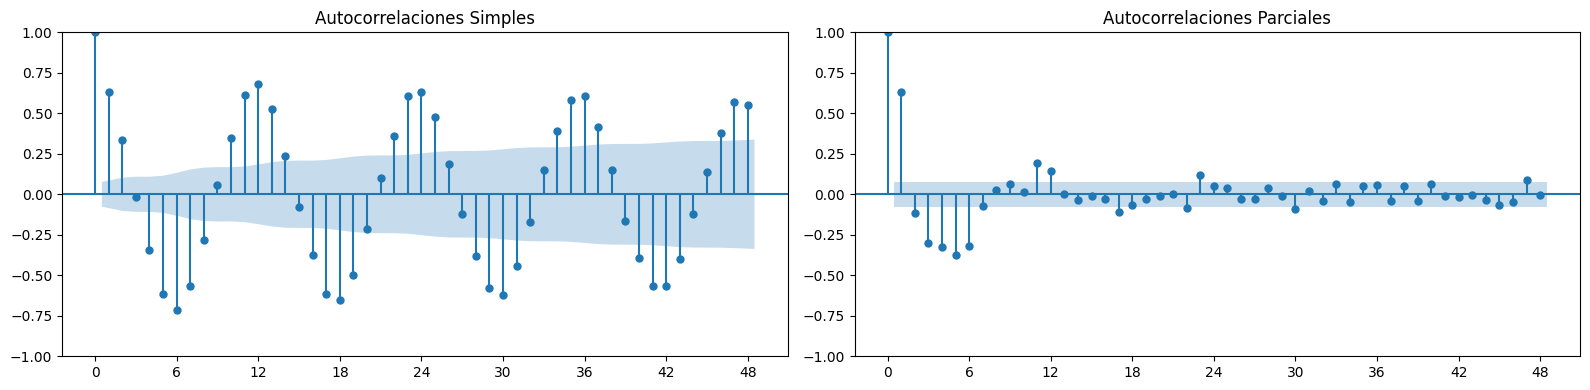

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(16, 4))

plot_acf(ypre, lags=48, ax=axs[0])
axs[0].xaxis.set_major_locator(plt.MultipleLocator(6))

# axs[0].set_ylim(-0.04, 0.04)
axs[0].set_title('Autocorrelaciones Simples')

plot_pacf(ypre, lags=48, ax=axs[1])
# axs[1].set_ylim(-0.04, 0.04)
axs[1].set_title('Autocorrelaciones Parciales')
axs[1].xaxis.set_major_locator(plt.MultipleLocator(6))

plt.tight_layout()
plt.show()
